# **TransJakarta Customer Profile and Profitization Analysis**

## **Importing Libraries and Dataset**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('Transjakarta.csv')
df.head(1)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0


## **Background of the Analysis**

### Background

TransJakarta, or Jakarta BRT is a bus rapid transit (BRT) system that operates in Jakarta, Indonesia. As the first BRT System in Southeast Asia, it commenced operations on 15 January 2004 to provide a fast public transport system to help reduce rush hour traffic. The system implements dedicated bus lanes that are separated from regular traffic roads called "corridors", to ensure smoother and faster travel for passengers. These corridors have expanded to cover more areas of the city as passenger rates skyrocket, with plans for further expansion in the future.

TransJakarta is now integrated with other modes of public transportation, including feeder buses and Jakarta Mass Rapid Transit (MRT) trains, allowing passengers to seamlessly transfer between different modes of transit to reach their destinations. 

The introduction of TransJakarta has helped reduce traffic congestion, cut down travel times for commuters and mitigat the city's carbon footprints by encouraging public transport as opposed to private vehicles. 

### Goals

Based on statistical data found in https://ppid.transjakarta.co.id/lihat/20200910154558, there has been a significant increase in passenger count and route from when TransJakarta first operated in 2004. In order to accomodate the rising amount of passengers and ensuring they receive the optimal TransJakarta experience, how are we able to improve our passenger's experience and optimize payment options for profit?

### Potential Analysis

- Route Expansion
    - identify and create new routes to cover areas with high transport duration 
- Payment and Ticketing
    - Determine which payment options is mostly used and how to optimize the payment options for profit increase
    - Improving outdated payment systems if any 
- Corridor Efficiency 
    - Find out which corridor has the most congestion based on hours in the week and weekends to improve corridor traffic or when to add armada
- Gender and Age Differences
    - View the demographic of TransJakarta users for marketing options and strategies, as well as improving facilities based on each demographic needs

## **Data Checking**

### **1. Overall View of the Data**

In [3]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [4]:
# Checking for column names as to gain an overall view of the data

df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

### Column Descriptions from the Dataset

A full description of each column as follows:

| Columns            | Description                                     |
|-------------------|------------------------------------------------|
| `transID`           | Unique transaction ID for every transaction |
| `payCardID`         | Customers main identifier. The card customers use as a ticket for entrance and exit |
| `payCardBank`       | Customers card bank issuer name |
| `payCardName`       | Customers name that is embedded in the card |
| `payCardSex`        | Customers sex that is embedded in the card |
| `payCardBirthDate`  | Customers birth year |
| `corridorID`        | Corridor ID / Route ID as key for route grouping (connected to corridorName) |
| `corridorName`      | Corridor Name / Route Name contains Start and Finish for each route|
| `direction`         | Binary numbers where 0 for Go, 1 for Back. Direction of the route |
| `tapInStops`        | Tap In (entrance) Stops ID for identifying stops name |
| `tapInStopsName`    | Tap In (entrance) Stops Name where customers tap in |
| `tapInStopsLat`     | Latitude of Tap In Stops   |
| `tapInStopsLon`     | Longitude of Tap In Stops   |
| `stopStartSeq`      | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction |
| `tapInTime`         | Time of tap in. Date and time |
| `tapOutStops`       | Tap Out (Exit) Stops ID for identifying stops name  |
| `tapOutStopsName`   | Tap out (exit) Stops Name where customers tap out                 |
| `tapOutStopsLat`    | Latitude of Tap Out Stops  |
| `tapOutStopsLon`    | Longitude of Tap Out Stops  |
| `stopEndSeq`        | Sequence of the stops, 1st stop, 2nd stops etc. Related to direction |
| `tapOutTime`        | Time of tap out. Date and time |
| `payAmount`         | The number of what customers pay. Some are free. Some are not |

### **2. Identifying Duplicates and Missing Values**

In [5]:
# Checking for duplicates 

duplicate = df[df.duplicated()]

if not duplicate.empty:
    print("Duplicated rows:")
    print(duplicate)
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [6]:
# Checking for unique values in each column

list_item =  []

for i in df.columns :
    list_item.append([i, df[i].nunique(), df[i].unique()])

UniqueTable = pd.DataFrame(columns=['Column Name', 'Total of Unique Value', 'Unique Sample'], data=list_item)
UniqueTable.sort_values(by='Total of Unique Value')

,Column Name,Total of Unique Value,Unique Sample
8,direction,2,"[1.0, 0.0]"
4,payCardSex,2,"[M, F]"
21,payAmount,3,"[3500.0, 20000.0, 0.0, nan]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
13,stopStartSeq,67,"[7, 13, 38, 23, 5, 3, 25, 2, 1, 15, 17, 12, 4,..."
19,stopEndSeq,74,"[12.0, 21.0, 39.0, 29.0, 15.0, 6.0, nan, 16.0,..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."


In the unique values data above, we see that there are 216 unique `corridorName` values but 221 unique `corridorID` values. Based on the column description, `corridorID` and `corridorName` should have the same amount of unique values as they represent one another. This will be included in the data cleaning process as to ensure that the columns that are going to be used will be viable for analysis. 

In [7]:
# Checking overall data to see missing values and overall data-type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [8]:
# Cheking missing values and their percentage

missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

,index,Total Null Values,Percentage
0,tapOutStops,2289,6.039578
1,corridorName,1930,5.092348
2,tapOutTime,1344,3.546174
3,stopEndSeq,1344,3.546174
4,tapOutStopsLon,1344,3.546174
5,tapOutStopsLat,1344,3.546174
6,tapOutStopsName,1344,3.546174
7,corridorID,1257,3.316623
8,tapInStops,1213,3.200528
9,payAmount,1007,2.656992


On the code above, we can see there are a few missing values on the columns `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsLat`, `tapOutStopsLon`, `tapOutTime`, and `payAmount` columns. These columns are going to be the checkpoint for data cleaning and treatment, whether or not we need to fill in the missing values or if they could be dropped.

Furthermore, there are a few columns with data-types that could be changed, such as tapInTime and tapOutTime. These will be treated during data wrangling along with subsequent columns that could be adjusted. 

## **Data Cleaning**

### **1. Fixing corridorID and corridorName unique values**

In the unique values data above, we see that there are 216 unique `corridorName` values but 221 unique `corridorID` values. Based on the column description, `corridorID` and `corridorName` should have the same amount of unique values as they represent one another. This will be included in the data cleaning process as to ensure that the columns that are going to be used will be viable for analysis. 

In [9]:
# Make a variable for the corridor that may have duplicates 

unique_corridors = df.groupby('corridorName')['corridorID'].nunique()
same_corridors_id = unique_corridors[unique_corridors > 1]

In [10]:
result_df = pd.DataFrame({'corridorName': same_corridors_id.index,
                          'uniqueCorridorID': same_corridors_id.values})

In [11]:
corridor_ids = []
for corridor_name in result_df['corridorName']:
    unique_ids = df[df['corridorName'] == corridor_name]['corridorID'].unique()
    corridor_ids.append(unique_ids)
result_df['corridorID'] = corridor_ids
result_df

,corridorName,uniqueCorridorID,corridorID
0,Blok M - Kota,2,"[M1, 1]"
1,Kalideres - Bundaran HI via Veteran,2,"[M3, 3, nan]"
2,Matraman Baru - Ancol,2,"[5, nan, M5]"
3,Pinang Ranti - Pluit,2,"[M9, 9, nan]"
4,Pulo Gadung - Monas,2,"[2, M2, nan]"


In [12]:
df.loc[(df['corridorName'] == 'Blok M - Kota') & (df['corridorID'] == 'M1'), 'corridorName'] = 'Blok M - Kota(M)'
df.loc[(df['corridorName'] == 'Kalideres - Bundaran HI via Veteran') & (df['corridorID'] == 'M3'), 'corridorName'] = 'Kalideres - Bundaran HI via Veteran(M)'
df.loc[(df['corridorName'] == 'Matraman Baru - Ancol') & (df['corridorID'] == 'M5'), 'corridorName'] = 'Matraman Baru - Ancol(M)'
df.loc[(df['corridorName'] == 'Pinang Ranti - Pluit') & (df['corridorID'] == 'M9'), 'corridorName'] = 'Pinang Ranti - Pluit(M)'
df.loc[(df['corridorName'] == 'Pulo Gadung - Monas') & (df['corridorID'] == 'M2'), 'corridorName'] = 'Pulo Gadung - Monas(M)'

The process above is to ensure that the corridor names that have duplicates is differentiated from each other, as they represent different working hours. M signifies that the corridor operates at nighttime. 

### **2. Cleaning `corridorID` and `corridorName` Missing Values**

> `corridorID` and `corridorName` are intertwined. corridorID represents the unique ID of each route from start to stop taken by each passenger, and the corridorName is the name of the bus stops from start to stop. Because our analysis includes finding out heavy traffic in each corridor to prevent overcrowding, having clean data on TransJakarta corridors is important.

In [13]:
# cleaning corridorID
missing_corridorID = df.dropna(subset=['corridorID']).drop_duplicates('corridorName')
missing_corridorID = missing_corridorID.set_index('corridorName')['corridorID']
missing_corridorID

def fill_missing_corridor_id(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['corridorName']):
        return missing_corridorID.get(row['corridorName'])
    return row['corridorID']

In [14]:
# Checking the missing values after being treated

df['corridorID'].isna().sum()

1257

> Since there are still 1257 missing values that needed to be cleaned, corridorID can also be filled using latitude and longitude stops.

In [15]:
# corridorID with tapInStopsLat and tapOutStopsLat
missing_corridorID2 = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
missing_corridorID2 = missing_corridorID2.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']
missing_corridorID2

tapInStopsLat  tapInStopsLon
-6.184631      106.84402              5
-6.228700      106.83302             6C
-6.133132      106.81435            R1A
-6.195743      106.93526            11D
-6.149650      106.88900             12
                                 ...   
-6.220486      106.86825        JAK.48B
-6.249482      106.84661         JAK.18
-6.190732      106.76743         JAK.30
-6.203099      106.73673         JAK.30
-6.142286      106.73712         JAK.52
Name: corridorID, Length: 2567, dtype: object

In [16]:
def fillna_corridorID_1 (row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return missing_corridorID2.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

df['corridorID'] = df.apply(fillna_corridorID_1, axis=1)

In [17]:
# Checking for missing values after treatment again
df['corridorID'].isna().sum()

36

> The remaining missing values in corridorID is now 36. We will do data cleaning on the corridorName and see how many remaining missing values it has after cleaning before we drop them altogether.

### **3. Cleaning `corridorName` Missing Values**

`corridorName`can be filled using `corridorID` columns as each unique values represent each other. Since the missing values in `corridorID` have been treated, this makes cleaning `corridorName` easier and more accurate.

In [18]:
 # Fill Missing Value on 'corridorName' based on 'corridorID'
mapping_corridor_name = df.dropna(subset='corridorName').drop_duplicates('corridorID')
mapping_corridor_name = mapping_corridor_name.set_index('corridorID')['corridorName']
display(mapping_corridor_name.head())

def fillna_corridorName (row) :
    if pd.isnull(row['corridorName']) and pd.notnull(row['corridorID']):
        return mapping_corridor_name.get(row['corridorID'])
    return row['corridorName']

df['corridorName'] = df.apply(fillna_corridorName, axis=1)

corridorID
5                         Matraman Baru - Ancol
6C     Stasiun Tebet - Karet via Patra Kuningan
R1A                          Pantai Maju - Kota
11D         Pulo Gebang - Pulo Gadung 2 via PIK
12                        Tanjung Priok - Pluit
Name: corridorName, dtype: object

In [19]:
# Checking corridorName missing values after cleaning

df['corridorName'].isna().sum()

33

> as the overall missing values after cleaning are 36 and 33 respectively and they cannot be filled, we will be dropping them to fully clean the data. 

In [20]:
# dropping remaining corridorID and corridorName missing values

df.dropna(subset=['corridorID', 'corridorName'], inplace=True)

In [21]:
# checking the missing values in corridorId and corridorName

df[['corridorID', 'corridorName']].isna().sum()

corridorID      0
corridorName    0
dtype: int64

### **4. Cleaning `tapOutStops` Missing Values**

In [22]:
# Fill Missing Value on 'tapOutStops' based on 'tapOutStopsName'
mapping_tapoutstops = df.dropna(subset='tapOutStops').drop_duplicates('tapOutStopsName')
mapping_tapoutstops = mapping_tapoutstops.set_index('tapOutStopsName')['tapOutStops']
display(mapping_tapoutstops)

def fillna_tapOutStops (row):
    if pd.isnull(row['tapOutStops']) and pd.notnull(row['tapOutStopsName']):
        return mapping_tapoutstops.get(row['tapOutStopsName'])
    return row['tapOutStops']

df['tapOutStops'] = df.apply(fillna_tapOutStops, axis=1)

tapOutStopsName
Tegalan                   P00253
Sampoerna Strategic      B03307P
Simpang Kunir Kemukus    B04962P
Raya Penggilingan        B03090P
Kali Besar Barat          P00098
                          ...   
Baladewa Residence       B00100P
Grand Centro Bintaro     B00688P
SMKN 56                  B05324P
MNC Studios              B02471P
RSUD Cengkareng          B03207P
Name: tapOutStops, Length: 2213, dtype: object

In [23]:
df['tapOutStops'].isna().sum()

1362

> from 2289 missing values, we now have 1362.

### **5. Cleaning `tapInStops` Missing Values**

In [24]:
# Fill Missing Value on 'tapInStops' based on 'tapInStopsName'
mapping_tapinstops = df.dropna(subset='tapInStops').drop_duplicates('tapInStopsName')
mapping_tapinstops = mapping_tapinstops.set_index('tapInStopsName')['tapInStops']
display(mapping_tapinstops)

def fillna_tapInStops (row):
    if pd.isnull(row['tapInStops']) and pd.notnull(row['tapInStopsName']):
        return mapping_tapinstops.get((row['tapInStopsName']))
    return row['tapInStops']

df['tapInStops'] = df.apply(fillna_tapInStops, axis=1)

tapInStopsName
Pal Putih                       P00142
Kemenkes 2                     B01963P
Gg. Kunir II                   B00499P
Taman Elok 1                   B05587P
Sunter Boulevard Barat          P00239
                                ...   
Jatinegara Timur               B01732P
Jln. Pancoran Timur III        B01450P
AKR Tower                      B00018P
Jln. Kartika Meruya Selatan    B01209P
Jln. Gunung Galunggung 1       B01087P
Name: tapInStops, Length: 2533, dtype: object

In [25]:
# Checking tapInStops missing values after being cleaned

df['tapInStops'].isna().sum()

34

> from 1213 missing values to 34.

In [26]:
# Checking for missing values based on percentage
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          0.000000
corridorName        0.000000
direction           0.000000
tapInStops          0.089795
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         3.597084
tapOutStopsName     3.546905
tapOutStopsLat      3.546905
tapOutStopsLon      3.546905
stopEndSeq          3.546905
tapOutTime          3.546905
payAmount           2.659518
dtype: float64

After the missing values for tapInStops have been filled, we can see that there are a few other columns with missing values that are under 5% after being cleaned. Since there are no other ways to fill the missing values we will drop them as it's under 5% and would not affect the data too much.

### **6. Dropping the Remaining Missing Values from Each Column (except payAmount)**

In [27]:
df.dropna(subset=['corridorID', 'tapInStops', 'tapOutStops', 'stopEndSeq', 'tapOutTime'], inplace=True)

In [28]:
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount           967
dtype: int64

### **7. Cleaning the payAmount Column**

The Transjakarta fare is set at a flat rate of Rp. 3500. However, for Royal Trans or corridors facilitating cross-Jabodetabek journeys (special), a fare of Rp. 20,000 is charged. Additionally, certain stops or conditions may offer a fare of Rp. 0, such as in JAK Lingko. Missing values in this column are assigned based on two conditions: if the corridor serves cross-Jabodetabek trips, it is filled with a fare amount of Rp. 20,000; otherwise, a flat fare of Rp. 3500 applies.

In [29]:
# checking the payAmount unique values 

df['payAmount'].unique()

array([ 3500., 20000.,     0.,    nan])

In [30]:
#Fill Missing Value on 'payAmount' based on 'corridorID'

mappingRoyalTrans = df[df['payAmount'] == 20000]['corridorID'].unique()
display(mappingRoyalTrans)

mappingTJ = df.dropna(subset='corridorID')
mappingTJ = df[(df['payAmount'] == 3500) & (~df['corridorID'].str.contains('JAK'))]['corridorID'].unique()
display(mappingTJ)

mappingJakLingko = df.dropna(subset='corridorID')
mappingJakLingko = df[(df['payAmount'] == 0) & (df['corridorID'].str.contains('JAK'))]['corridorID'].unique()
display(mappingJakLingko)

array(['1T', 'B14', 'T21', 'D32', 'S31', '1P', '6C', '7C', 'B13', 'D31',
       '1K', '6P', 'S12', '1N'], dtype=object)

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', '6M',
       'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E', 'M4',
       '9H', '13D', '5N', '6T', '5F', '2P', 'S21', 'M12', '1N', '6U',
       '10', '2B', '10K', '6D', '6A', '4F', '6B', '5B', '3', 'M6', '8',
       '3F', 'S11', '2F', 'D32', '1H', '4C', 'M13', '8D', '4D', '7', '9C',
       'D21', 'D11', '8M', '1B', '7F', '6', '10H', '3E', '12H', '9', '1A',
       '11P', '11M', 'T21', 'BW9', 'M7B', '10A', '3H', '3C', '11K', 'B13',
       '2Q', 'M5', '1R', '7B', 'M1H'], dtype=object)

array(['JAK.03', 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', 'JAK.15',
       'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06', 'JAK.14',
       'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19', 'JAK.75', 'JAK.52',
       'JAK.37', 'JAK.31', 'JAK.43C', 'JAK.117', 'JAK.49', 'JAK.20',
       'JAK.118', 'JAK.27', 'JAK.13', 'JAK.84', 'JAK.08', 'JAK.23',
       'JAK.07', 'JAK.22', 'JAK.115', 'JAK.21', 'JAK.26', 'JAK.64',
       'JAK.47', 'JAK.01', 'JAK.120', 'JAK.85', 'JAK.10', 'JAK.41',
       'JAK.86', 'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45',
       'JAK.18', 'JAK.51', 'JAK.54', 'JAK.110A', 'JAK.25', 'JAK.30',
       'JAK.39', 'JAK.80', 'JAK.11', 'JAK.17', 'JAK.58', 'JAK.34',
       'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', 'JAK.38', 'JAK.61', 'JAK.24', 'JAK.35',
       'JAK.05', 'JAK.33', 'JAK.106', 'JAK.28', 'JAK.48B', 'JAK.53',
       'JAK.99', 'JAK.12'], dtype=object)

In [31]:
# Function to Fill Missing Value in 'payAmount' column:
def fillna_payAmount1 (row):
    if row['corridorID'] in mappingRoyalTrans and pd.isnull(row['payAmount']):
        return 20000
    elif row['corridorID'] in mappingTJ and pd.isnull(row['payAmount']):
        return 3500
    elif row['corridorID'] in mappingJakLingko and pd.isnull(row['payAmount']):
        return 0
    return row['payAmount']

In [32]:
df['payAmount'] = df.apply(fillna_payAmount1, axis=1)

In [33]:
df['payAmount'].isna().sum()

242

In [34]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
JAK.48A    242
Name: count, dtype: int64

In [35]:
#Fill Missing Value 'payAmount' based on 'corridorID' with condition the values are 'JAK.48A'
df.loc[(df['corridorID'] == 'JAK.48A') & (df['payAmount'].isna()), 'payAmount'] = 0

The code above is used to fill in the missing values from the JAK column, which uses 0 rupiah as fare as it is free.

In [36]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

The data is fully cleaned of missing values.

### **8. Time Modification**

In [37]:
# Changing the time dataType into dateTime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [38]:
df['tapInHour'] = df['tapInTime'].dt.hour

In [39]:
df['tapOutHour'] = df['tapOutTime'].dt.hour

In [40]:
# Day 

df['tapInDay'] = df['tapInTime'].dt.dayofweek

In [41]:
tapInDay = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [42]:
df['tapInDay'] = df['tapInDay'].map(tapInDay)

### **9. Adding Columns for Age, Age Group and Bus Type**

In [43]:
df['age'] = 2023 - df['payCardBirthDate']

In [44]:
# dividing column by age

def age_group(age):
    if age < 15:
        return 'Child'
    elif 16 <= age <= 19:
        return  'Teenager'
    elif 20 <= age <= 30:
        return 'Young Adult'
    elif 31 <= age <= 59:
        return 'Adult'
    else:
        return 'Elderly'

In [45]:
df['ageGroup'] = df['age'].apply(age_group)

In [46]:
# Making new column for payAmount classification
def trans_type (payAmount) :
    if payAmount == 3500:
        return 'Busway'
    elif payAmount == 20000:
        return 'RoyalTrans'
    else:
        return 'Mikrotrans'
    
df['transType'] = df['payAmount'].apply(trans_type)

df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,age,ageGroup,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,15,Elderly,Busway
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,26,Young Adult,Busway
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,31,Adult,Busway
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,45,Adult,Busway
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,41,Adult,Busway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,Friday,19,Teenager,Busway
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,Tuesday,49,Adult,Busway
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,Tuesday,47,Adult,RoyalTrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20,Saturday,47,Adult,Mikrotrans


### **10. Changing Direction**

In [47]:
df['direction'] = df['direction'].replace({0: 'departure', 1: 'arrival'})

In [48]:
df['direction'].unique()

array(['arrival', 'departure'], dtype=object)

## **Data Insight and Analysis**

### **1. TransJakarta Customer Profile and Behavior**

**1.1 TransJakarta Passenger Gender Proportions**

In [49]:
gender_pers = df['payCardSex'].value_counts() / len(df) * 100
gender_pers

payCardSex
F    53.266979
M    46.733021
Name: count, dtype: float64

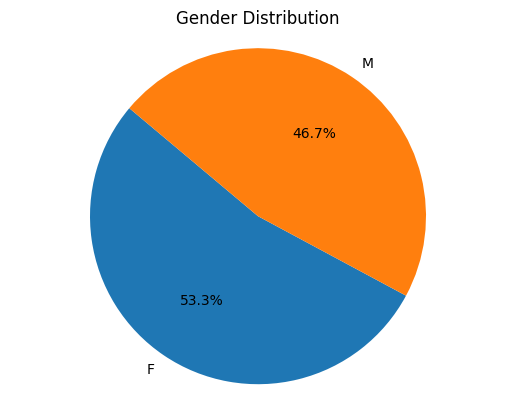

In [50]:
gender_pers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Insight:

- Female passengers make-up more than 50% of the TransJakarta passenger demographic, however without a very wide margin compared to the male passengers
- This is an overall distribution of male and female passenger demographic, without taking into account of the age group

**1.2 TransJakarta Passenger Proportions based on ageGroup**

In [51]:
# Calculate the distribution of age
age_distribution = df['ageGroup'].value_counts().reset_index()
age_distribution

,ageGroup,count
0,Adult,20036
1,Young Adult,8904
2,Teenager,3015
3,Child,2929
4,Elderly,1587


C:\Users\Nabila\AppData\Local\Temp\ipykernel_4112\3338463324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ageGroup', y='count', data=age_distribution, palette='muted')


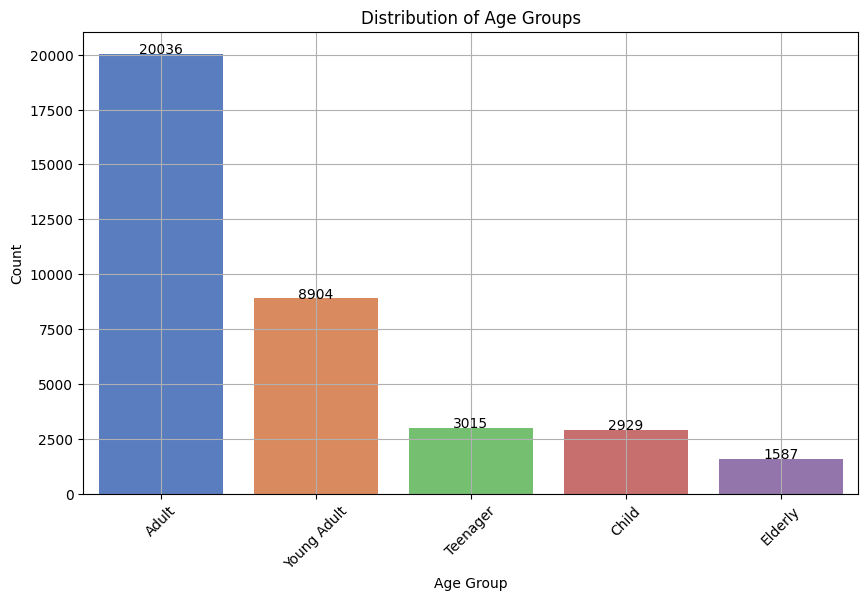

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ageGroup', y='count', data=age_distribution, palette='muted')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Add labels for each bar
for index, row in age_distribution.iterrows():
    plt.text(index, row['count'], row['count'], color='black', ha='center')

plt.grid(True)
plt.show()

Insight: 

- TransJakarta passenger demographic is mainly adults from the age range of 31 to 59, followed by young-adults from the age range of 20 to 30
- The age demographic which uses TransJakarta the least is the elderly, from the age range of 59 and above 
- Teenager and children from the age range of 0 - 19 years old have similar counts 

**1.3 TransJakarta Passenger Proportions based on Gender and Age-Group**

In [53]:
female_df = df[df['payCardSex'] == 'F']

In [54]:
corridor_female_df = female_df['corridorName'].value_counts().reset_index()
corridor_female_df=corridor_female_df.sort_values(by='count', ascending=False).head(5)
corridor_female_df

,corridorName,count
0,Pasar Minggu - Tanah Abang,225
1,Poris Plawad - Bundaran Senayan,215
2,Rusun Rawa Bebek - Kodamar,213
3,Cilangkap - Cililitan,201
4,Terminal Tanah Merah - Pulo Gadung,199


C:\Users\Nabila\AppData\Local\Temp\ipykernel_4112\2816590087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='corridorName', y='count', data=corridor_female_df, palette=transjakarta2_colors)


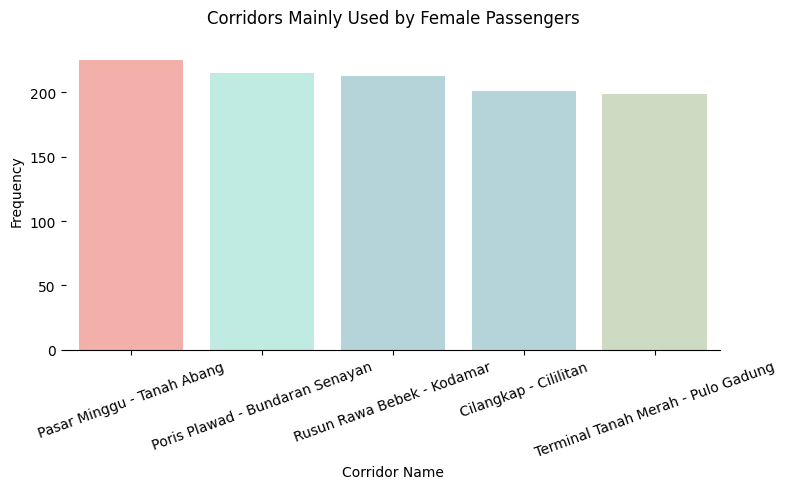

In [55]:
transjakarta2_colors = ['#ffa69e', '#b8f2e6', '#aed9e0', '#aed9e0', '#cbdfbd']
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='corridorName', y='count', data=corridor_female_df, palette=transjakarta2_colors)

plt.xlabel('Corridor Name')
plt.ylabel('Frequency')
plt.title('Corridors Mainly Used by Female Passengers')
plt.xticks(rotation=20)
plt.ylim(0, corridor_female_df['count'].max() * 1.1)
sns.despine(left=True, top=True)
max_count = corridor_female_df['count'].max()
ax.grid(False)

plt.tight_layout()
plt.show()

### **2. TransJakarta Peak Hours**

**2.1 TransJakarta Peak Hours**

In [56]:
rush_hour = pd.crosstab(df['tapInDay'], df['tapInHour'])
rush_hour

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Friday,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Monday,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366
Saturday,110,91,90,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Sunday,100,98,107,114,93,98,102,99,114,80,114,101,116,98,117,127,71
Thursday,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Tuesday,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Wednesday,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381


In [57]:
orderbyday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_hour = rush_hour.reindex(orderbyday)

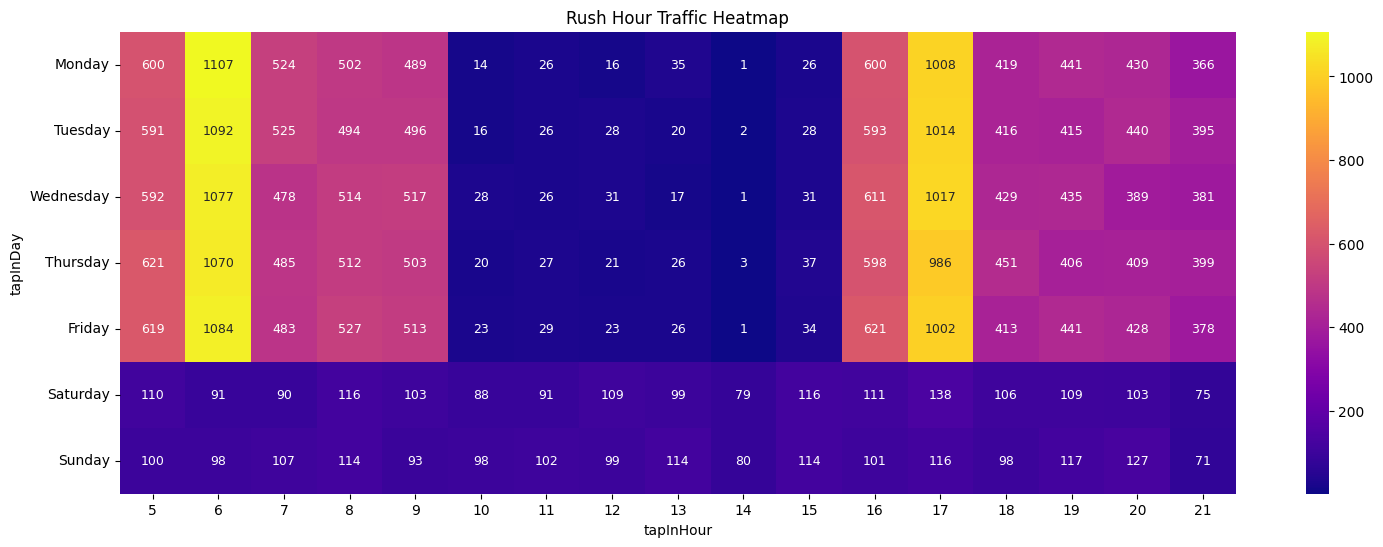

In [58]:
custom_colors = ["#FFD700", "#FFA500", "#FF8C00"]

plt.figure(figsize=(18, 6))
sns.set_palette(custom_colors)
sns.heatmap(rush_hour, annot=True,
            annot_kws={'size': 9}, fmt='.0f',
            cmap='plasma')
plt.title('Rush Hour Traffic Heatmap')
plt.show()

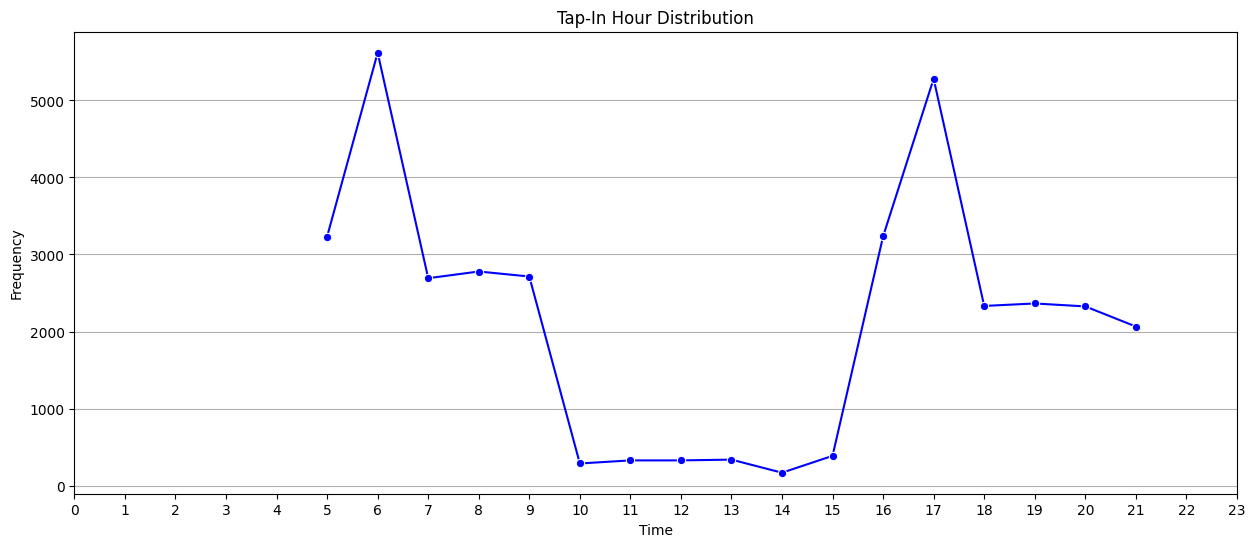

In [59]:
plt.figure(figsize=(15, 6))

# Assuming 'tapIn_hour' is your x-axis variable and you want to count its occurrences
sns.lineplot(data=df['tapInHour'].value_counts().sort_index(), marker='o', color='blue')

plt.title('Tap-In Hour Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(range(24))

plt.show()

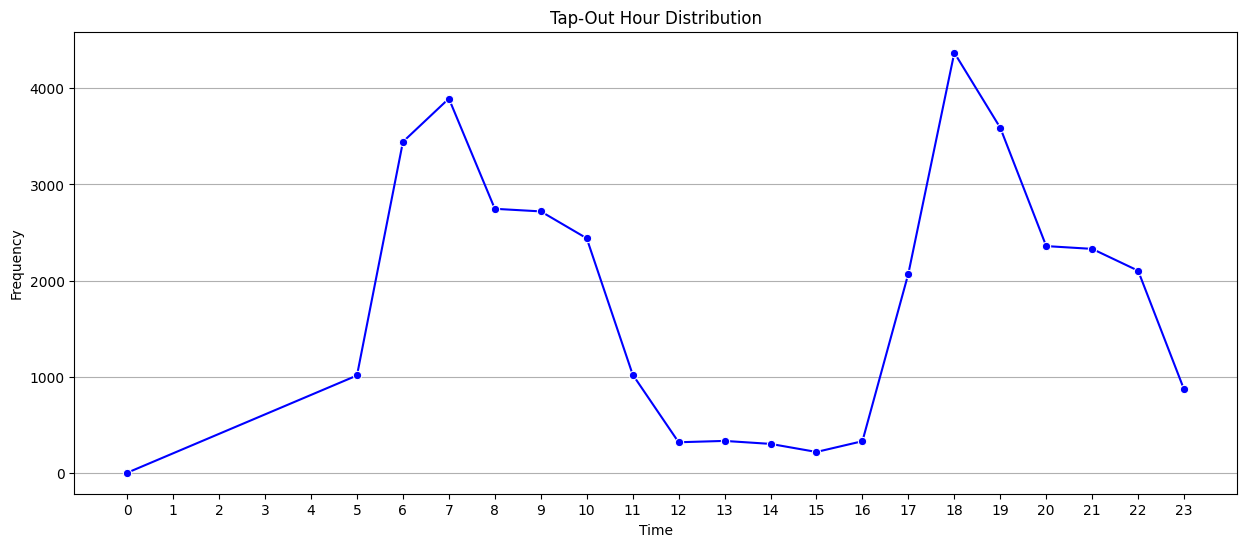

In [60]:
plt.figure(figsize=(15, 6))

# Assuming 'tapIn_hour' is your x-axis variable and you want to count its occurrences
sns.lineplot(data=df['tapOutHour'].value_counts().sort_index(), marker='o', color='blue')

plt.title('Tap-Out Hour Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(range(24))

plt.show()

In [61]:
# combining both tap in hour and tap in time 
df_combined_hour = df.melt(value_vars=['tapInHour', 'tapOutHour'], 
                         var_name='Type', 
                         value_name='Hour')
df_combined_hour

,Type,Hour
0,tapInHour,5
1,tapInHour,5
2,tapInHour,5
3,tapInHour,5
4,tapInHour,6
...,...,...
72937,tapOutHour,19
72938,tapOutHour,22
72939,tapOutHour,13
72940,tapOutHour,20


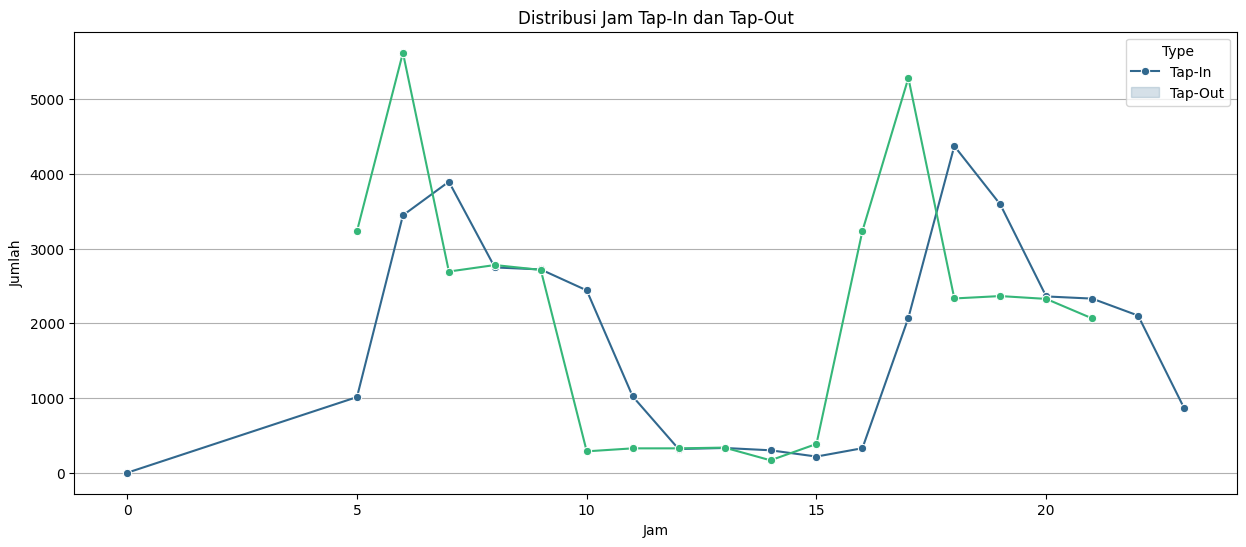

In [62]:
plt.figure(figsize=(15, 6))

# Assuming df_combined_hour is your DataFrame and you want to plot the count of 'Type' over 'Hour'
# Aggregate the data by 'Hour' and 'Type' and calculate the count
count_data = df_combined_hour.groupby(['Hour', 'Type']).size().reset_index(name='Count')

# Create line plot using seaborn
sns.lineplot(data=count_data, x='Hour', y='Count', hue='Type', palette='viridis', marker='o')

plt.title('Distribusi Jam Tap-In dan Tap-Out')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.grid(axis='y')
plt.legend(title='Type', labels=['Tap-In', 'Tap-Out'])

plt.show()

Insight:



### **3. Busiest Corridors**

**3.1 Busiest Corridors based on Weekdays**

In [63]:
weekday = df[(df['tapInDay']!='Saturday') & (df['tapInDay']!='Sunday')]

In [64]:
busiest_weekdays = weekday.groupby(['corridorName', 'corridorID']).size().reset_index(name='tap_in_counts')
busiest_weekdays.head(10)

,corridorName,corridorID,tap_in_counts
0,Andara - Stasiun Universitas Pancasila,JAK.44,228
1,BKN - Blok M,6U,1
2,BKN - Blok M,M7B,288
3,BSD - Jelambar,S11,115
4,BSD Serpong - Fatmawati,S12,78
5,Batusari - Grogol,8K,242
6,Bekasi Barat - Blok M,B13,117
7,Bekasi Barat - Kuningan,B14,207
8,Bekasi Timur - Cawang,B21,205
9,Bintara - Cipinang Indah,JAK.85,124


C:\Users\Nabila\AppData\Local\Temp\ipykernel_4112\4070180113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tap_in_counts', y='corridorName', data=busiest_weekdays_top10, palette='viridis')


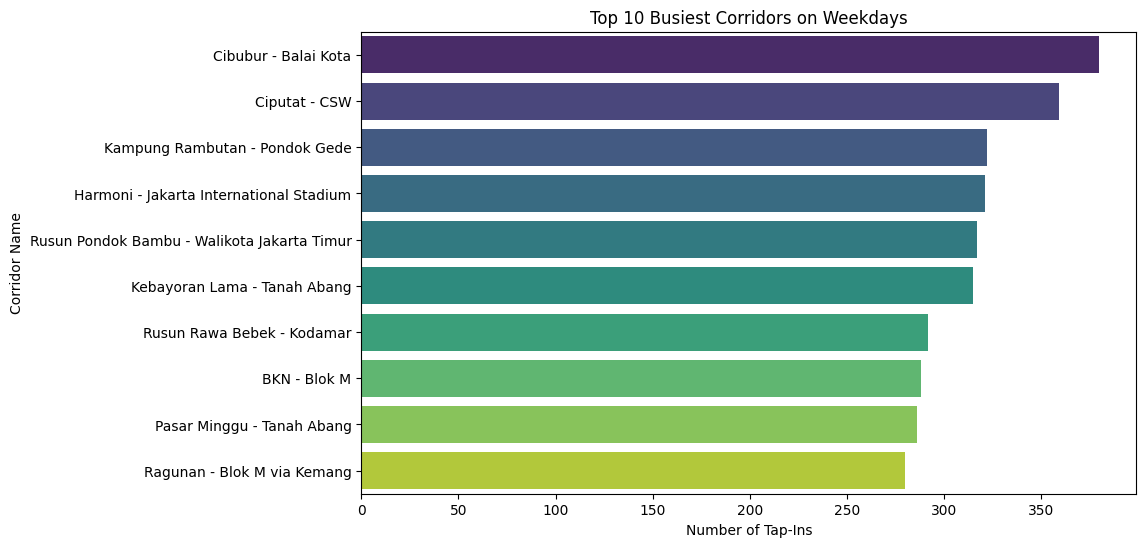

In [65]:
# Sort the DataFrame by 'tapIn_counts' in descending order and select the top 10 rows
busiest_weekdays_top10 = busiest_weekdays.sort_values(by='tap_in_counts', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='tap_in_counts', y='corridorName', data=busiest_weekdays_top10, palette='viridis')
plt.xlabel('Number of Tap-Ins')
plt.ylabel('Corridor Name')
plt.title('Top 10 Busiest Corridors on Weekdays')
plt.show()

Insight:

- On weekdays the busiest corridors are Cibubur - Balai Kota, followed by Ciputat - CSW, and Kampung Rambutan - Pondok Gede 

In [66]:
weekend = df[(df['tapInDay']=='Saturday') | (df['tapInDay']=='Sunday')]

In [67]:
busiest_weekend = weekend.groupby(['corridorName', 'corridorID']).size().reset_index(name='tapIn_counts')
busiest_weekend.head(10)

,corridorName,corridorID,tapIn_counts
0,Andara - Stasiun Universitas Pancasila,JAK.44,10
1,BKN - Blok M,M7B,19
2,BSD - Jelambar,S11,9
3,BSD Serpong - Fatmawati,S12,15
4,Batusari - Grogol,8K,10
5,Bekasi Barat - Blok M,B13,12
6,Bekasi Barat - Kuningan,B14,19
7,Bekasi Timur - Cawang,B21,12
8,Bintara - Cipinang Indah,JAK.85,14
9,Bintaro - Blok M,8E,12


C:\Users\Nabila\AppData\Local\Temp\ipykernel_4112\1654350555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tapIn_counts', y='corridorName', data=busiest_weekend_top10, palette='viridis')


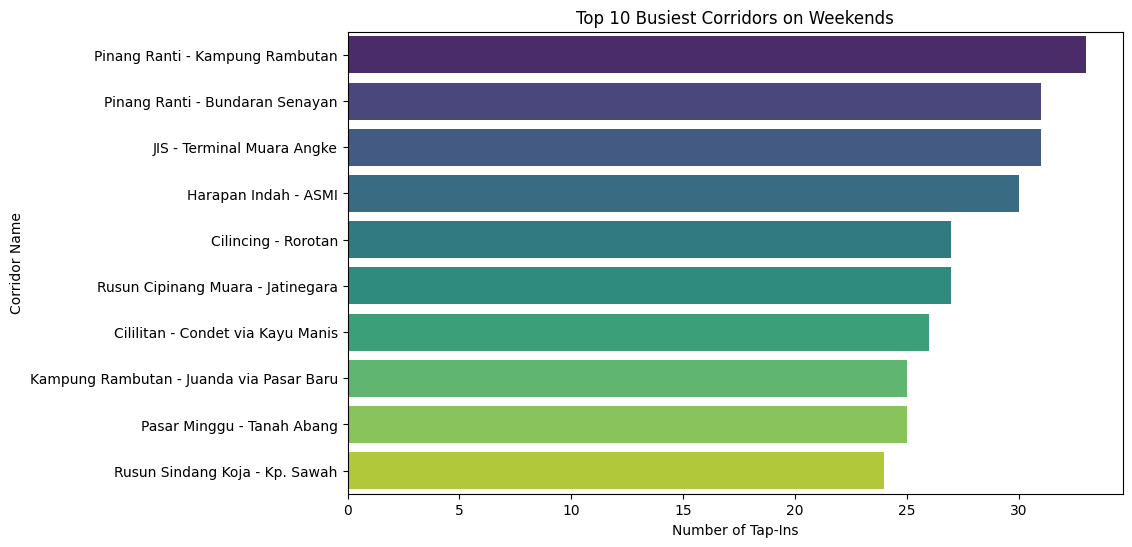

In [68]:

busiest_weekend_top10 = busiest_weekend.sort_values(by='tapIn_counts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='tapIn_counts', y='corridorName', data=busiest_weekend_top10, palette='viridis')
plt.xlabel('Number of Tap-Ins')
plt.ylabel('Corridor Name')
plt.title('Top 10 Busiest Corridors on Weekends')
plt.show()

In [69]:
female_df = df[df['payCardSex'] == 'F']

In [70]:
corridor_female_df = female_df['corridorName'].value_counts().reset_index()
corridor_female_df=corridor_female_df.sort_values(by='count', ascending=False).head(5)
corridor_female_df

,corridorName,count
0,Pasar Minggu - Tanah Abang,225
1,Poris Plawad - Bundaran Senayan,215
2,Rusun Rawa Bebek - Kodamar,213
3,Cilangkap - Cililitan,201
4,Terminal Tanah Merah - Pulo Gadung,199


In [71]:
age_corridor_counts = df.groupby(['ageGroup', 'corridorName']).size().reset_index(name='count')
most_used_corridors = age_corridor_counts.loc[age_corridor_counts.groupby('ageGroup')['count'].idxmax()]
most_used_corridors_sorted = most_used_corridors.sort_values(by='count', ascending=False)
most_used_corridors_sorted

,ageGroup,corridorName,count
162,Adult,Rusun Pondok Bambu - Walikota Jakarta Timur,246
737,Young Adult,Kampung Melayu - Pulo Gebang via BKT,132
562,Teenager,Kampung Rambutan - Pondok Gede,92
266,Child,Kampung Rambutan - Juanda via Pasar Baru,90
375,Elderly,BKN - Blok M,90


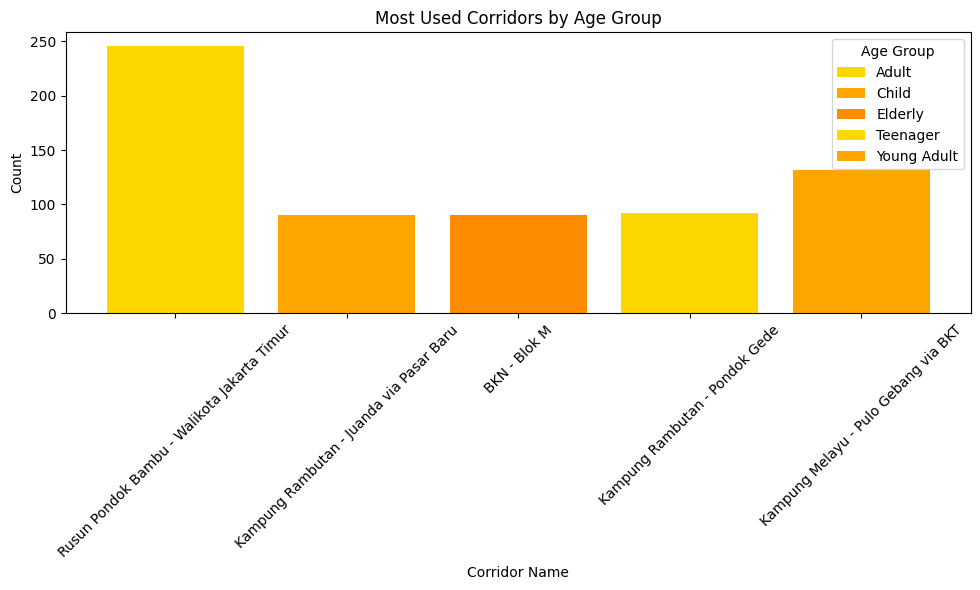

In [72]:
plt.figure(figsize=(10, 6))
for age_group, group_data in most_used_corridors_sorted.groupby('ageGroup'):
    plt.bar(group_data['corridorName'], group_data['count'], label=age_group)

plt.title('Most Used Corridors by Age Group')
plt.xlabel('Corridor Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



In [73]:
elderly_df = df[df['ageGroup'] == 'Elderly']

In [74]:
corridor_counts = elderly_df['corridorName'].value_counts().reset_index()
corridor_counts_sorted=corridor_counts.sort_values(by='count', ascending=False)
top_corridors =corridor_counts_sorted.head(5)
top_corridors

,corridorName,count
0,BKN - Blok M,90
1,Ragunan - Gelora Bung Karno,77
2,Poris Plawad - Bundaran Senayan,54
3,Pulo Gadung 2 - Dukuh Atas 2,42
4,Tanjung Priok - Plumpang,41


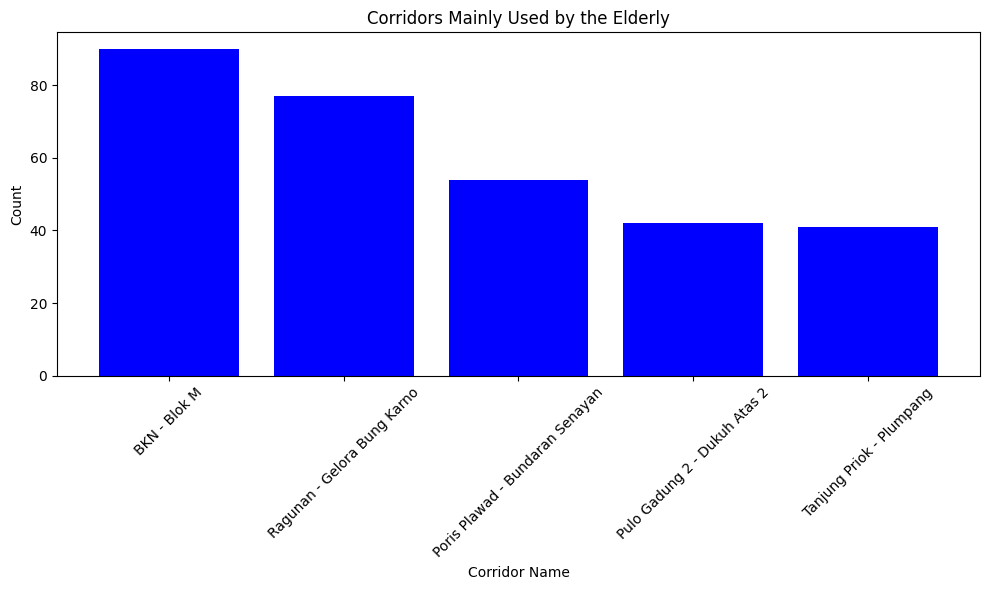

In [75]:
plt.figure(figsize=(10, 6))

plt.bar(top_corridors['corridorName'], top_corridors['count'], color='blue')

plt.title('Corridors Mainly Used by the Elderly')
plt.xlabel('Corridor Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **4. Card Payment Usage**

In [76]:
# card payment usage overall
payment_type = df['payCardBank'].value_counts()
payment_type.groupby(df['ageGroup']).value_counts()
payment_type

payCardBank
dki       18013
emoney     6625
brizzi     3390
flazz      3101
online     2764
bni        2578
Name: count, dtype: int64

Insight:

- In this data, it shows that DKI is the dominating payment usage from all the other payment options. However, this is revealed to be the case since TransJakarta has a partnership with DKI that causes a monopoly on the card payment usage. 
- We will find the usage of card payment based on age group for marketing analyses.

In [77]:
card_banks = ['emoney', 'brizzi', 'flazz', 'online', 'bni']
counts_list = []

for bank in card_banks:
    counts = df[df['payCardBank'] == bank]['ageGroup'].value_counts()
    counts_list.append(counts)

result_df = pd.concat(counts_list, axis=1, keys=card_banks)
print(result_df)

             emoney  brizzi  flazz  online   bni
ageGroup                                        
Adult          3381    1880   1705    1753  1435
Young Adult    1642     865    788     464   404
Teenager        720     229    204     127   330
Child           654     240    231     250   276
Elderly         228     176    173     170   133


Insight:


## **Data Conclusion and Recommendation**

### **Conclusion**

1. Passenger Profile:
    - Female passengers make up most of the TransJakarta passenger demographic, despite not being that much different from the male passenger demographic. However, due to the policy of inclusive fleets specifically for women, the urgency of special fleets for female passengers in the analyzed areas can be reconsidered. 
    - The majority of Transjakarta users fall into the adult age category (30-59 years old) and young adults (20 - 29 years old), but adjustments also need to be made to meet the needs of the elderly group, as part of PT. Transjakarta's responsibility in providing transportation facilities that are friendly and comfortable. 
2. Peak Hour Times:
    - Peak hours are mostly located in the mornings at 5am to 9am, and in the evenings starting from 4pm to 7pm for weekdays, and on weekends peak hours are much less than weekdays but with a constant and stabile stream of passengers throughout the day. 
3. Busiest Corridors:
    - The corridors that are busiest on weekdays are Cibubur - Balai Kota, followed by Ciputat - CSW and Kampung Rambutan - Pondok Gede. They are most commonly used for work commute as the surrounding areas is a hub for offices. The corridors that are busiest on weekends are Pinang Ranti - Kampung Rambutan, followed by Pinang Ranti - Bundaran Senayan and JIS - Terminal Muara Angke that passes through a lot of areas for socializing.  
4. Card Payment Usage:
    - Bank DKI holds the biggest card payment usage out of the remaining options as it has a collaboration with TransJakarta, however card usages without partnership lies on emmoney, brizzi and flazz as the top three leading usages. 

### **Reccomendations**

1. Improving Facilities for Women:
    - Expanding women-only bus services on corridors frequently used by female passengers. 
2. Improving Facilities for the Elderly:
    - Provide more elderly-friendly facilities at bus stops, such as priority seating and readable information.
    - Conduct more campaigns to improve awareness in prioritizing the elderly.
    -  Modify fleets with more priority seating on routes commonly used by seniors.
3. Optimization of Fleet and Facilities on Busy Corridors:
    - Increasing fleet capacity on congested corridors. 
    - Fleet augmentation can be achieved by reallocating buses from less crowded corridors to busy ones.
    - Ensure availability for fleets matches passenger numbers during peak times.
4. Card Payment Usage:
    - Market card usage catered to the age range demographic of passengers in order to optimize profit. 